### 本日のお題

1. 速度チャネル図の作成
2. スペクトルの表示
3. PV図を作ってみよう

In [18]:
# モジュールimports
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube as sc
import aplpy
import astropy.units as u
from jupyter_io import savefig_in_notebook
from astropy.wcs import WCS
import matplotlib as mpl

In [19]:
font = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = font
plt.rcParams['mathtext.it'] = font + ':italic'
plt.rcParams['mathtext.bf'] = font + ':bold'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [20]:
hdu = fits.open('/home/amigos/r_yamada/ymdfits/W3_analy_shell.fits')[0]

data = hdu.data
header = hdu.header

In [31]:
cube = sc.read(hdu)

In [27]:
def grid_plot(hdu, ncols, nrows, start_ch, ch_intervals, t_range, color):
    
    wcs = WCS(hdu)
    cube = sc.read(hdu)
    main_figsize = (36, 36) 
    plt.clf()
    main_fig = plt.figure(figsize=main_figsize)
    ncols_f = float(ncols)
    nrows_f = float(nrows)

    name_list = ['a', 'b', 'c', 'd', 'e', 'f','g', 'h','i']
    
    for i in np.arange(ncols*nrows):

        #ここが大事
        subplt_size = [0.05+(i%ncols_f)*0.95/ncols_f, 0.95-np.ceil((i+1)/ncols_f)*0.90/nrows_f, 0.85/ncols_f, 0.8/nrows_f]
        
        
        #make slice of the map 
        
        integ_start_ch = start_ch+ch_intervals*(i)
        integ_last_ch = start_ch+ch_intervals*(i+1)
        x1, y1, z1 = wcs.wcs_pix2world(0,0, integ_start_ch, 0)
        x2, y2, z2 = wcs.wcs_pix2world(0,0, integ_last_ch, 0)
        subcube = cube[integ_start_ch:integ_last_ch,:,:]
        subcube = subcube.with_spectral_unit(u.km / u.s)
        
        calccube = subcube.moment(order=0)
        if ( i < nrows*ncols):
            f = aplpy.FITSFigure(calccube.hdu, figure=main_fig, subplot=subplt_size, aspect='equal')
            f.show_colorscale(vmin=t_range[0], vmax=t_range[1], cmap=color, aspect='equal', stretch='linear')
            f.ticks.set_color('black')
            
            #f.show_contour(levels=[lev], colors='black',zorder=10)
            
            print(f'({(name_list[i])}){z1/1000:.1f} to {z2/1000:.1f} km/s')
            f.set_title(f'({(name_list[i])}){z1/1000:.1f} to {z2/1000:.1f} km/s')

        if ( i < (nrows*ncols)-ncols):
            f.axis_labels.hide_x()
            f.tick_labels.hide_x()
            f.ticks.show()

        if (not i == 0 and not i == 3 and not i == 6):

            f.axis_labels.hide_y()
            f.tick_labels.hide_y()
            f.ticks.show()    

        if (i == 0):
            #f.add_scalebar(scalebar_length*60, '1 pc', color = 'black')
            #f.scalebar.set_corner('top right')
            #f.scalebar.set_linewidth(5)
            #f.scalebar.set_label('10 pc')
            f.add_beam()
            f.beam.set_corner('top left')
            f.beam.set_color('black')

# カラーバーは錬成
    ax1 = main_fig.add_axes([0.99, 0.05, 0.02, 0.87]) #[左端、下端、幅、高さ]
    sm = mpl.cm.ScalarMappable(cmap='inferno_r', norm=plt.Normalize(0,1))
    cb1 = main_fig.colorbar(sm, cax=ax1, 
                   ticks=np.arange(0, 1.01, 0.25),
                   format=mpl.ticker.FuncFormatter(lambda x,_: x*t_range[1]))
    cb1.set_label('Integrated Intensity [K km s$^{-1}]$')
    #plt.tight_layout()

    #ax1.tick_params(labelsize=12)
    
    #f.savefig(path+pdfname)  

(a)-60.0 to -55.0 km/s
(b)-55.0 to -50.0 km/s
(c)-50.0 to -45.0 km/s
(d)-45.0 to -40.0 km/s
(e)-40.0 to -35.0 km/s
(f)-35.0 to -30.0 km/s
(g)-30.0 to -25.0 km/s
(h)-25.0 to -20.0 km/s
(i)-20.0 to -15.0 km/s


<Figure size 432x288 with 0 Axes>

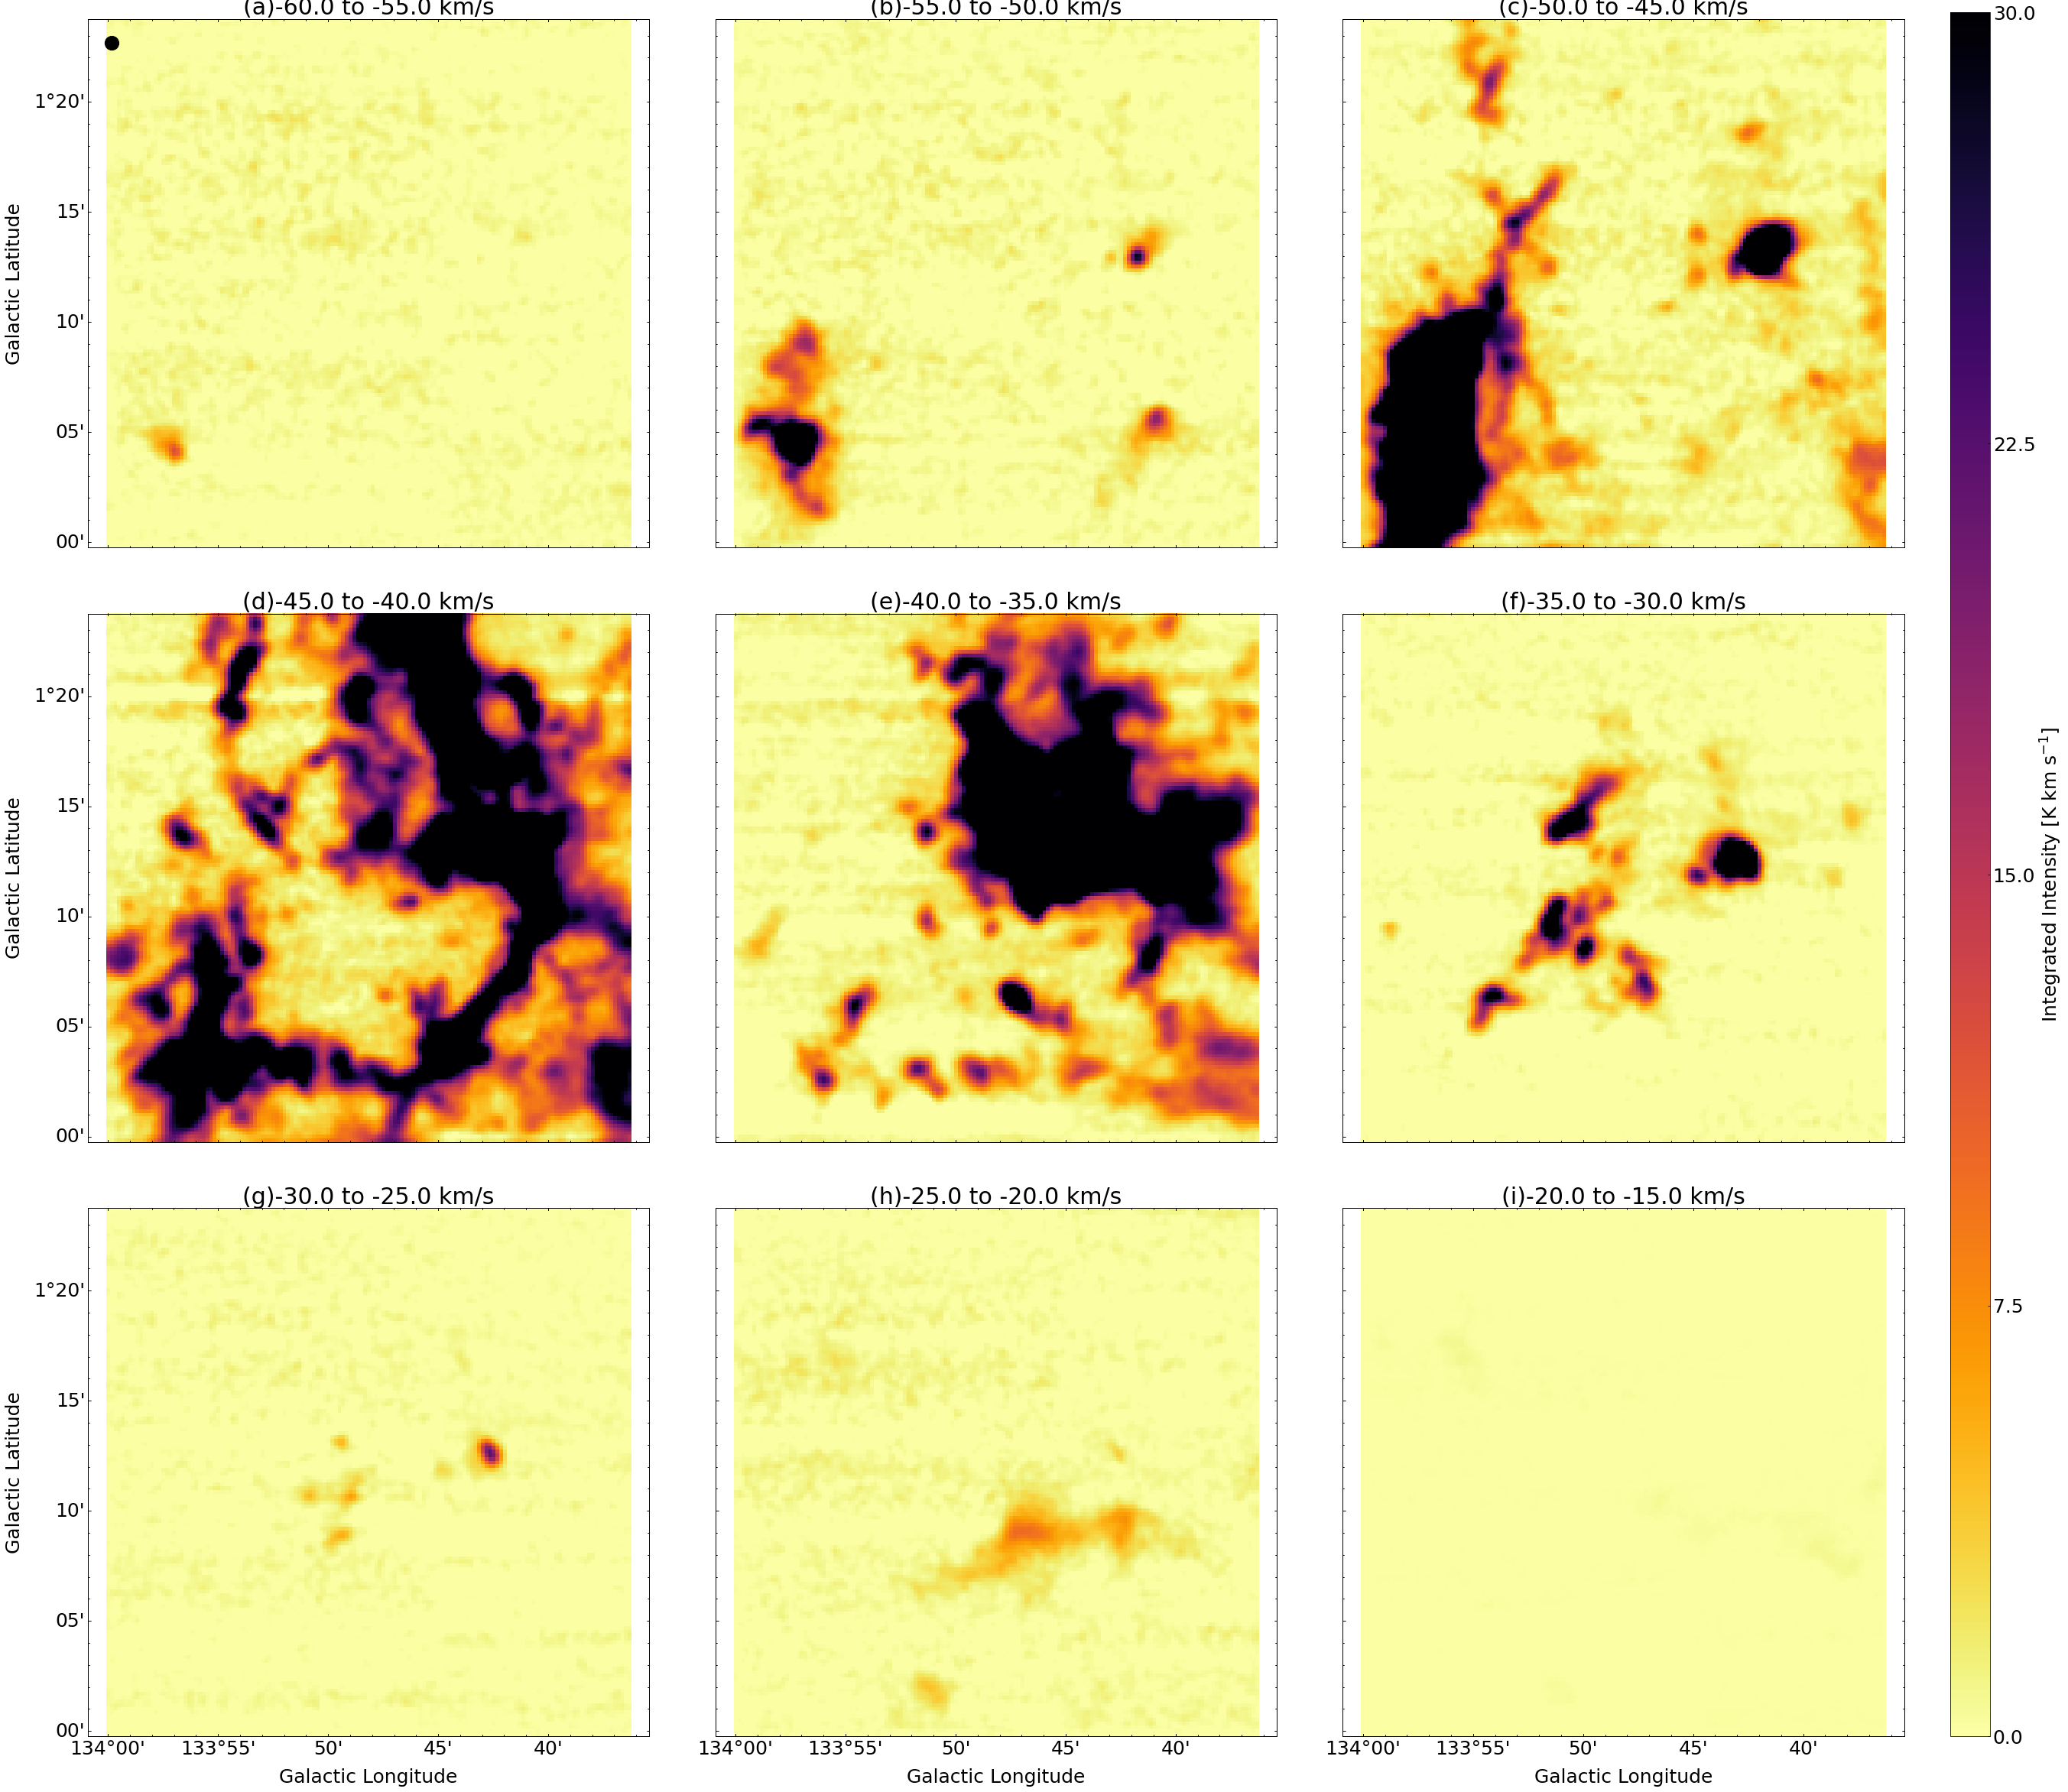

In [28]:
grid_plot(hdu=hdu, ncols=3, nrows=3, start_ch=20, ch_intervals=10, t_range=[0,30], color='inferno_r')

# 練習問題

1. 2×2のチャンネルマップを作ってみよう
2. カラーレンジを変えてみよう

# スペクトル


スペクトルを書くためには, 
1. 速度情報が入ったarray
2. スペクトルが入ったアレイ
が必要

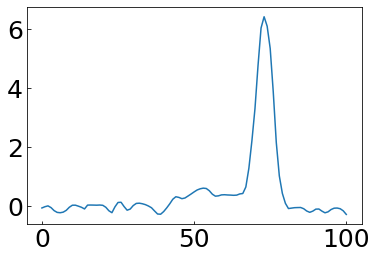

In [29]:
# Sample

plt.plot(data[:,55,55])

# 練習問題

横軸がちゃんと速度になった物を作ってみよう

# 位置速度図

結構難しいので頑張りましょう

前回と同じくspectral cube+aplpyの組み合わせで作っていきます。

In [35]:
cube = cube.with_spectral_unit(u.km/u.s)
lvcube = cube.moment(order=0, axis=1)

In [55]:
nh = lvcube.hdu.header

In [56]:
nhdu = fits.PrimaryHDU(lvcube.hdu.data, nh)

In [57]:
nhdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  143                                                  
NAXIS2  =                  101                                                  
HISTORY This FITS file uses the old GLS convention                              
HISTORY See AIPS Memo 46 for details                                            
VOBS    =                -45.0 / km/sec                                         
OBJECT  = 'W3_field'  /                                                         
BUNIT   = 'deg K   '           / Main Beam Temperature                          
DATAMIN =   -3.06100702286E+00  /                                               
DATAMAX =    5.35642585754E+01  /                                               
DATE    = '2008-04-26'  /   

INFO: Auto-setting vmin to -4.283e-01 [aplpy.core]
INFO: Auto-setting vmax to  4.339e+00 [aplpy.core]


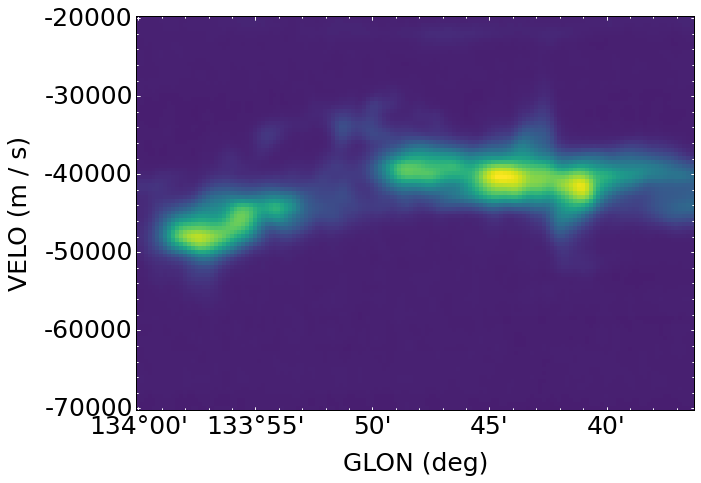

In [58]:
f = aplpy.FITSFigure(nhdu)
f.show_colorscale()
f.set_yaxis_coord_type('scalar')